# Import Libraries

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Dataset

In [6]:
df = pd.read_csv('marketing_and_product_performance.csv')
df

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CMP_U1BQY9,PROD_F204EM,49183.07,25,720,95399.69,4.61,CUST_K3F0GA,Premium,18,FLASH_WOTOXI,25,95,BNDL_6DN251,196.59,3,Affordable
9996,CMP_ZQDI7T,PROD_5313XR,38519.59,3503,799,38999.04,3.31,CUST_SY9H51,Standard,18,FLASH_3HIKX0,10,5,BNDL_24U1RG,461.12,2,Durable
9997,CMP_SYFTKH,PROD_44T74P,21532.92,1140,428,39646.56,5.00,CUST_C6LMF4,Standard,19,FLASH_W3KMY9,37,191,BNDL_MIA2QO,248.20,3,Stylish
9998,CMP_FTAW8H,PROD_CPN4QT,35546.54,1078,409,6785.63,4.08,CUST_URFVAQ,Basic,31,FLASH_L4UDXZ,59,73,BNDL_PHIE38,217.78,4,Affordable


### Analyzing the dataset

In [15]:
df.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [21]:
df.tail()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
9995,CMP_U1BQY9,PROD_F204EM,49183.07,25,720,95399.69,4.61,CUST_K3F0GA,Premium,18,FLASH_WOTOXI,25,95,BNDL_6DN251,196.59,3,Affordable
9996,CMP_ZQDI7T,PROD_5313XR,38519.59,3503,799,38999.04,3.31,CUST_SY9H51,Standard,18,FLASH_3HIKX0,10,5,BNDL_24U1RG,461.12,2,Durable
9997,CMP_SYFTKH,PROD_44T74P,21532.92,1140,428,39646.56,5.00,CUST_C6LMF4,Standard,19,FLASH_W3KMY9,37,191,BNDL_MIA2QO,248.20,3,Stylish
9998,CMP_FTAW8H,PROD_CPN4QT,35546.54,1078,409,6785.63,4.08,CUST_URFVAQ,Basic,31,FLASH_L4UDXZ,59,73,BNDL_PHIE38,217.78,4,Affordable
9999,CMP_3L1U09,PROD_W5MSRO,7179.69,1682,935,96707.63,1.74,CUST_25UP1Z,Premium,3,FLASH_ZGYPFO,68,4,BNDL_H5CC7E,392.44,3,Innovative


In [17]:
df.shape

(10000, 17)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Campaign_ID                        10000 non-null  object 
 1   Product_ID                         10000 non-null  object 
 2   Budget                             10000 non-null  float64
 3   Clicks                             10000 non-null  int64  
 4   Conversions                        10000 non-null  int64  
 5   Revenue_Generated                  10000 non-null  float64
 6   ROI                                10000 non-null  float64
 7   Customer_ID                        10000 non-null  object 
 8   Subscription_Tier                  10000 non-null  object 
 9   Subscription_Length                10000 non-null  int64  
 10  Flash_Sale_ID                      10000 non-null  object 
 11  Discount_Level                     10000 non-null  int6

In [23]:
df.describe()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25263.607524,2481.903600,498.978700,50038.627579,2.756365,18.016500,39.421000,100.689600,275.198346,2.500900
std,14350.085927,1435.973623,289.479495,28545.702337,1.296901,10.149666,17.212925,57.074015,129.218710,1.113249
min,500.440000,10.000000,1.000000,1002.080000,0.500000,1.000000,10.000000,1.000000,50.010000,1.000000
25%,12789.190000,1225.750000,247.000000,25264.255000,1.630000,9.000000,24.000000,52.000000,165.717500,2.000000
50%,25030.170000,2451.000000,499.000000,49513.815000,2.750000,18.000000,39.000000,101.000000,272.555000,2.000000
75%,37921.725000,3723.000000,751.000000,74507.157500,3.890000,27.000000,54.000000,150.000000,387.322500,3.000000
max,49999.630000,4999.000000,999.000000,99999.470000,5.000000,35.000000,69.000000,199.000000,499.970000,4.000000


In [25]:
df.describe(include='object').T

,count,unique,top,freq
Campaign_ID,10000,10000,CMP_RLSDVN,1
Product_ID,10000,10000,PROD_HBJFA3,1
Customer_ID,10000,10000,CUST_1K7G39,1
Subscription_Tier,10000,3,Basic,3416
Flash_Sale_ID,10000,10000,FLASH_1VFK5K,1
Bundle_ID,10000,10000,BNDL_29U6W5,1
Common_Keywords,10000,4,Affordable,2559


In [27]:
df.isnull().sum()

Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64

In [29]:
df.nunique()

Campaign_ID                          10000
Product_ID                           10000
Budget                                9995
Clicks                                4298
Conversions                            999
Revenue_Generated                     9997
ROI                                    451
Customer_ID                          10000
Subscription_Tier                        3
Subscription_Length                     35
Flash_Sale_ID                        10000
Discount_Level                          60
Units_Sold                             199
Bundle_ID                            10000
Bundle_Price                          8977
Customer_Satisfaction_Post_Refund        4
Common_Keywords                          4
dtype: int64

In [31]:
df.dtypes

Campaign_ID                           object
Product_ID                            object
Budget                               float64
Clicks                                 int64
Conversions                            int64
Revenue_Generated                    float64
ROI                                  float64
Customer_ID                           object
Subscription_Tier                     object
Subscription_Length                    int64
Flash_Sale_ID                         object
Discount_Level                         int64
Units_Sold                             int64
Bundle_ID                             object
Bundle_Price                         float64
Customer_Satisfaction_Post_Refund      int64
Common_Keywords                       object
dtype: object

## Visualizations

#### Distribution Of Revenue Generated

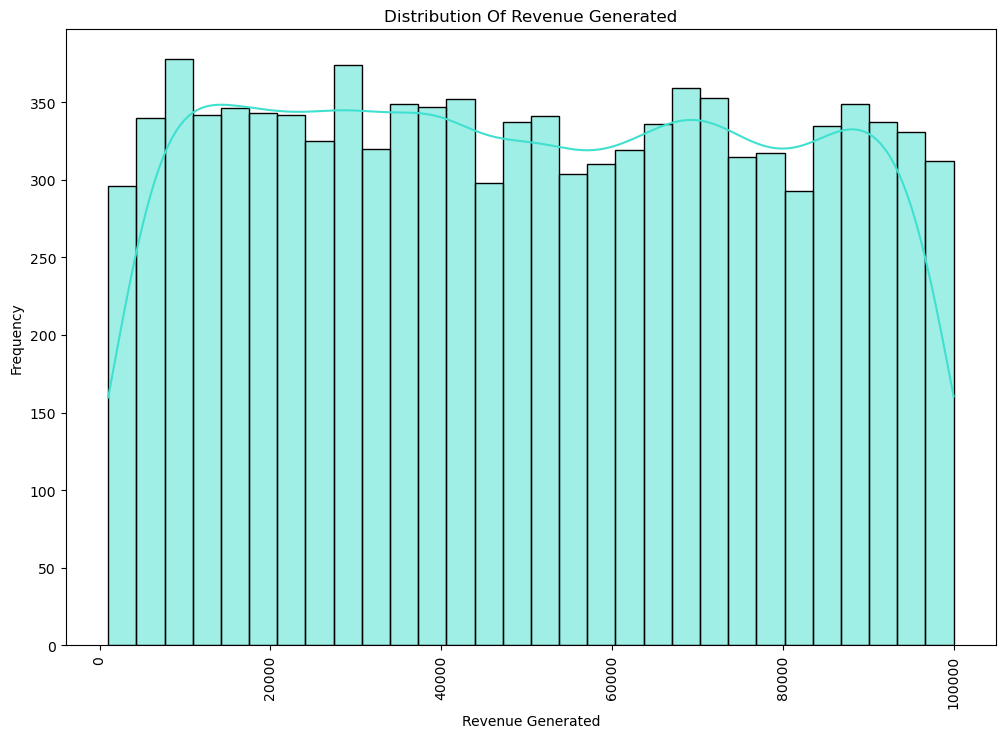

In [37]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Revenue_Generated'], bins=30, kde=True, color='turquoise')
plt.title('Distribution Of Revenue Generated')
plt.xlabel('Revenue Generated')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

#### ROI By Subscription Tier

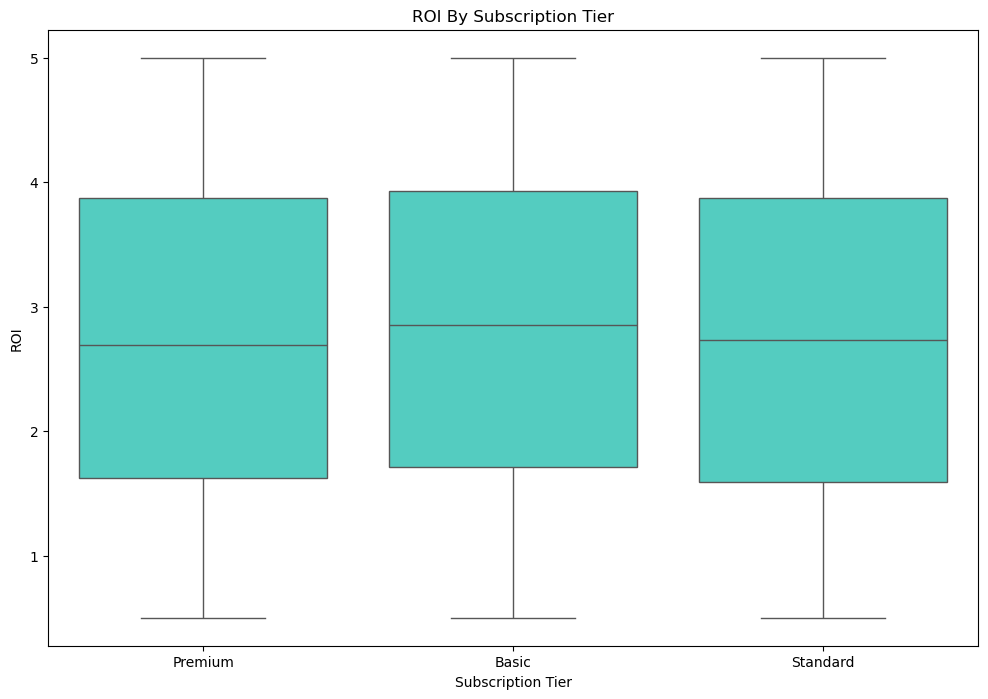

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Subscription_Tier', y='ROI', data=df, color='turquoise')
plt.title('ROI By Subscription Tier')
plt.xlabel('Subscription Tier')
plt.ylabel('ROI')
plt.show()

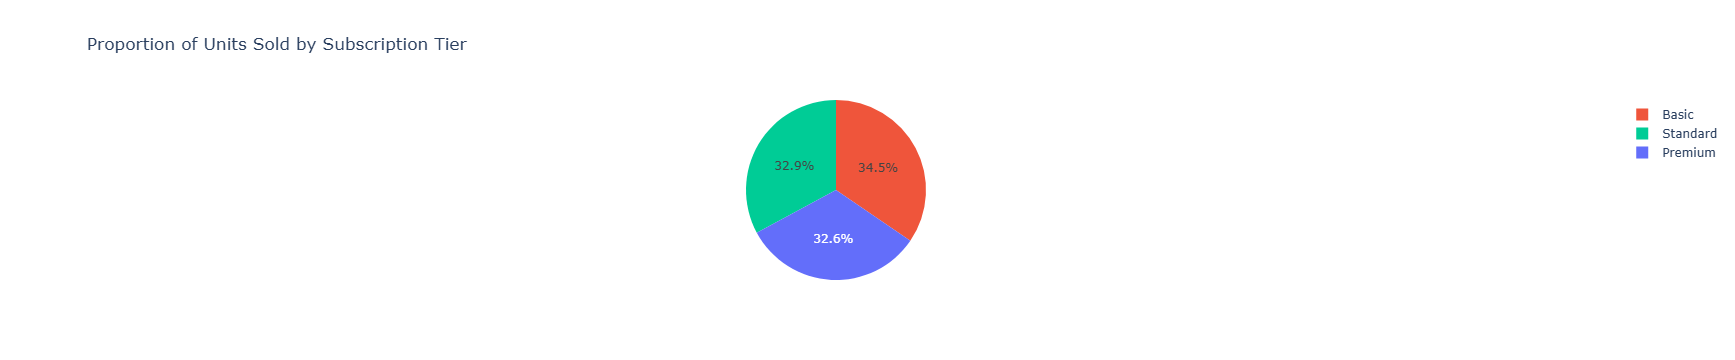

In [87]:
fig_pie = px.pie(df, names='Subscription_Tier', values='Units_Sold', title="Proportion of Units Sold by Subscription Tier", color="Subscription_Tier")
fig_pie.show()

#### Units Sold By Discount Level

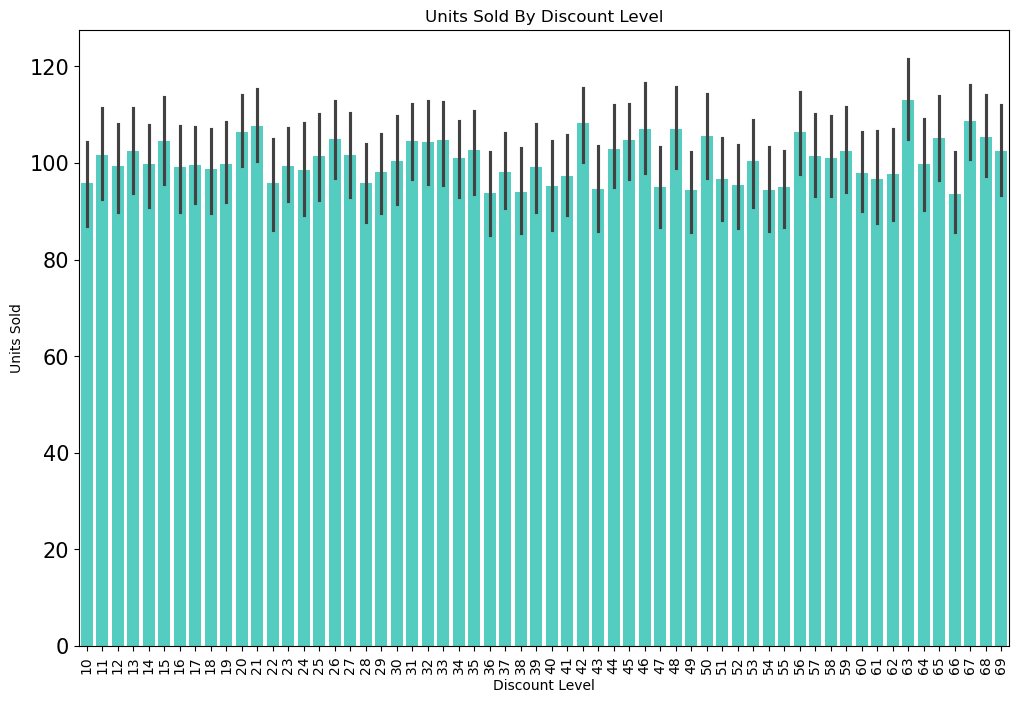

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Discount_Level', y='Units_Sold', data=df, color='turquoise')
plt.title('Units Sold By Discount Level')
plt.xlabel('Discount Level')
plt.ylabel('Units Sold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.show()

#### Correlation Matrix

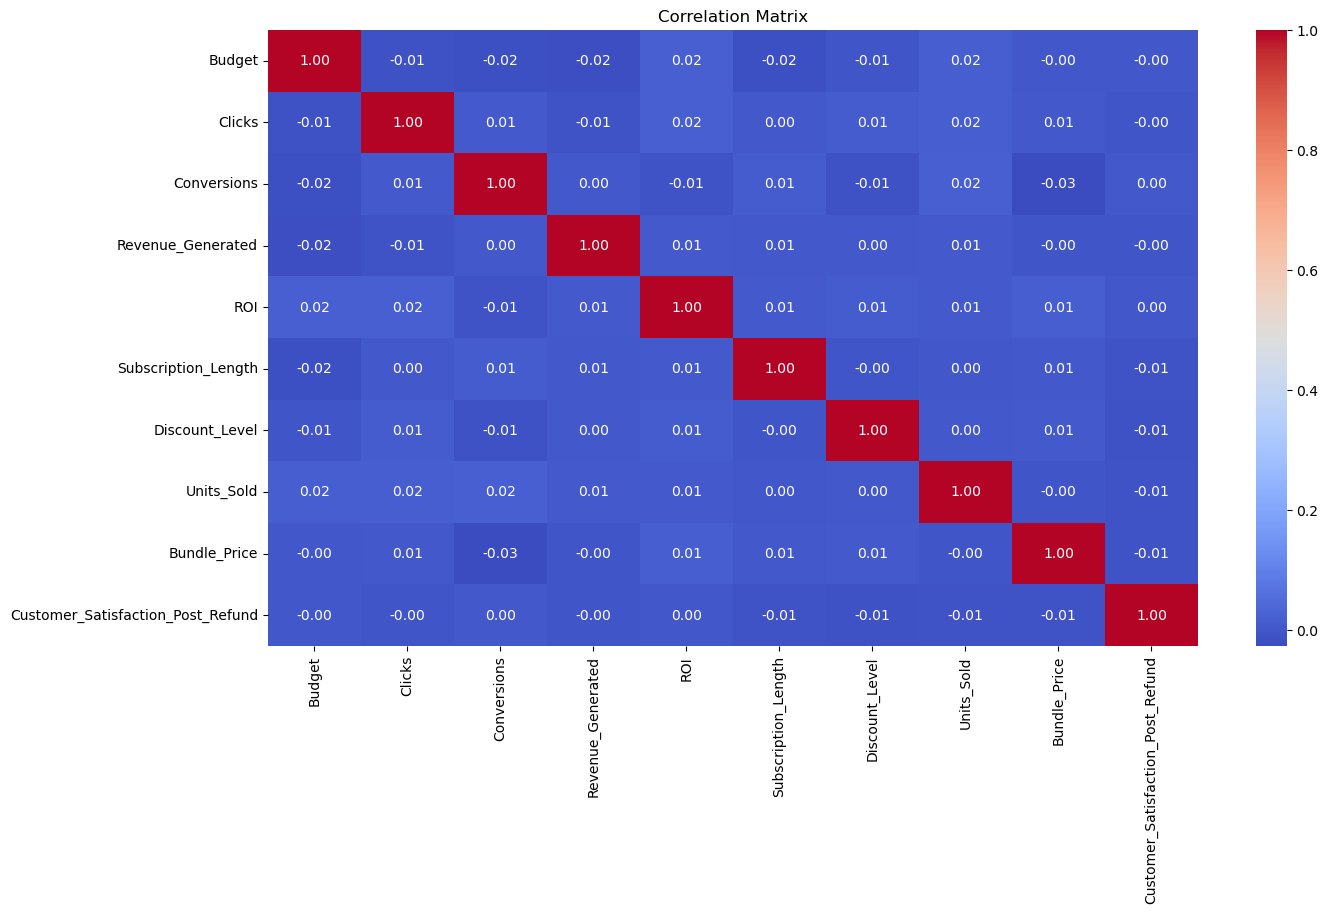

In [92]:
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15,8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Predictive Modeling

#### Define features and target variable

In [100]:
X = num_df.drop('Revenue_Generated', axis=1)
y = num_df['Revenue_Generated']

#### Split data into training and testing sets

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Initialise and train model

In [106]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

#### Predict test set

In [114]:
y_predic = model.predict(X_test)

#### Calculate the Mean Squared Error

In [117]:
mse = mean_squared_error(y_test, y_predic)
print(f'mean squared error: {mse}')

mean squared error: 848958732.6829469
